In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_gunung = pd.read_csv('/content/drive/My Drive/dataset/datagunung_lvl.csv',delimiter=',')
df_gunung = df_gunung.rename(columns={"Id": "mountain_id"})
df_gunung.head()

,mountain_id,Daerah,Nama_Gunung,Ketinggian,Lokasi,Trek,Jalur,Simaksi,Level
0,101,Jawa barat,Gunung Cermai,"3,078","Kuningan, Majalengka, dan Cirebon.",Tanah Kering,"Jalur Apuy, Linggarjati dan Jalur Palutungan",Rp30.000,1
1,102,Jawa barat,Gunung Puntang,"2,223",Kab. Bandung,Tanah kering,-,Rp40.000,1
2,103,Jawa barat,Gunung Papandayan,"2,666",Kab. Garut.,bebatuan,-,Rp60.000,1
3,104,Jawa barat,Gunung Gede Pangrango,"2,958",Bogor,Tangga Buatan,Jalur Cibodas dan Jalur Putri,Rp75.000,1
4,105,Jawa barat,Gunung Pangrango,"3,019",Cibodas,Akar Pohon,Jalur Cibodas,Rp75.000,2


In [ ]:
df_gunung.shape

(17, 9)

In [4]:
df_user = pd.read_csv('/content/drive/My Drive/dataset/MOCK_DATA.csv',delimiter=',')
df_user.head()

,Id,Nama,Email,Password,Domisili,Jenis Kelamin,Umur,Pengalaman
0,1,Harcourt Leppington,hleppington0@reference.com,Zjvy1t,Yogyakarta,Perempuan,24,12
1,2,Cristi Weeds,cweeds1@blogtalkradio.com,GRjASvqhv,Cilacap,Laki-laki,18,5
2,3,Thorny Gidden,tgidden2@acquirethisname.com,hTBgDny2C2p7,Semarang,Perempuan,48,9
3,4,Thibaut Spurdens,tspurdens3@omniture.com,aUz4mmfRq,Cilacap,Perempuan,54,10
4,5,Cristionna Gaul,cgaul4@storify.com,5dU6hdn,Malang,Laki-laki,61,18


In [5]:
df_user.shape

(1000, 8)

In [6]:
df_rating = pd.read_csv('/content/drive/My Drive/dataset/rating_data.csv',delimiter=',')
df_rating['mountain_id'] = df_rating['mountain_id']+100 
df_rating.head()

,user_id,mountain_id,rating
0,284,113,2
1,33,111,5
2,167,108,1
3,623,105,5
4,378,110,1


In [7]:
df_rating.shape

(5000, 3)

In [8]:
mountain_id = df_rating['mountain_id']
# List of conditions
conditions = [
    (mountain_id == 101),
    (mountain_id == 102),
    (mountain_id == 103),
    (mountain_id == 104),
    (mountain_id == 105),
    (mountain_id == 106),
    (mountain_id == 107),
    (mountain_id == 108),
    (mountain_id == 109),
    (mountain_id == 110),
    (mountain_id == 111),
    (mountain_id == 112),
    (mountain_id == 113),
    (mountain_id == 114),
    (mountain_id == 115),
    (mountain_id == 116),
    (mountain_id == 117)]
# List of values to return
choices  = [
    "Gunung Cermai",
    "Gunung Puntang",
    "Gunung Papandayan",
    "Gunung Gede",
    "Gunung Pangrango",
    "Gunung Cikuray",
    "Gunung Prau",
    "Gunung Merbabu",
    "Gunung Sindoro",
    "Gunung Slamet",
    "Gunung Sumbing",
    "Gunung Arjuno",
    "Gunung Argopuro",
    "Gunung Lawu",
    "Gunung Semeru",
    "Gunung Raung",
    "Gunung Panderman",
    
]
# create a new column in the DF based on the conditions
df_rating.insert(2, 'mount_name', np.select(conditions, choices, "ERROR")) 

In [9]:
mountain_id = df_rating['mountain_id']
# List of conditions
conditions = [
    (mountain_id == 101),
    (mountain_id == 102),
    (mountain_id == 103),
    (mountain_id == 104),
    (mountain_id == 105),
    (mountain_id == 106),
    (mountain_id == 107),
    (mountain_id == 108),
    (mountain_id == 109),
    (mountain_id == 110),
    (mountain_id == 111),
    (mountain_id == 112),
    (mountain_id == 113),
    (mountain_id == 114),
    (mountain_id == 115),
    (mountain_id == 116),
    (mountain_id == 117)]
# List of values to return
choices  = [
    1,1,1,1,2,1,1,2,2,2,3,3,3,2,3,3,2
    
]
# create a new column in the DF based on the conditions
df_rating.insert(3, 'level', np.select(conditions, choices, "ERROR")) 

In [10]:
df_rating = df_rating.sort_values(['mountain_id']).reset_index(drop=True)
df_rating.head(15)

,user_id,mountain_id,mount_name,level,rating
0,210,101,Gunung Cermai,1,4
1,851,101,Gunung Cermai,1,4
2,760,101,Gunung Cermai,1,1
3,723,101,Gunung Cermai,1,5
4,660,101,Gunung Cermai,1,1
5,725,101,Gunung Cermai,1,2
6,844,101,Gunung Cermai,1,2
7,450,101,Gunung Cermai,1,5
8,520,101,Gunung Cermai,1,5
9,513,101,Gunung Cermai,1,5


In [11]:
data_rating = df_rating.drop(['level','mount_name'],axis=1)
data_rating.head()

,user_id,mountain_id,rating
0,210,101,4
1,851,101,4
2,760,101,1
3,723,101,5
4,660,101,1


In [ ]:
# from google.colab import files
# data_rating.to_csv('rating_data.csv',index=True,encoding = 'utf-8-sig')
# files.download('rating_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
convert_dict = {'level': int}
 
df_rating = df_rating.astype(convert_dict)

In [13]:
df_rating = df_rating.sort_values(['user_id']).reset_index(drop=True)
print(df_rating.head())
print(df_rating.shape)
print(df_rating.info())

   user_id  mountain_id        mount_name  level  rating
0        1          113   Gunung Argopuro      3       1
1        1          112     Gunung Arjuno      3       2
2        1          109    Gunung Sindoro      2       1
3        1          117  Gunung Panderman      2       4
4        2          109    Gunung Sindoro      2       4
(5000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      5000 non-null   int64 
 1   mountain_id  5000 non-null   int64 
 2   mount_name   5000 non-null   object
 3   level        5000 non-null   int64 
 4   rating       5000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 195.4+ KB
None


In [14]:
avg_mount_rate = df_rating.groupby(['mountain_id']).mean()
avg_mount_rate = avg_mount_rate.drop(['user_id'],axis=1)
avg_mount_rate = avg_mount_rate.sort_values(['rating'], ascending=False)
avg_mount_rate.head()

<ipython-input-14-6b694f445c44>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_mount_rate = df_rating.groupby(['mountain_id']).mean()


,level,rating
mountain_id,,
117,2.0,3.190000
114,2.0,3.151724
103,1.0,3.104418
107,1.0,3.048544
101,1.0,3.045752


In [15]:
count_user = df_rating.groupby(['user_id']).count()
count_user = count_user.drop(['mountain_id'],axis=1)
count_user = count_user.sort_values(['user_id'], ascending=False)
count_user.head()


,mount_name,level,rating
user_id,,,
1000,4,4,4
999,6,6,6
998,10,10,10
997,2,2,2
996,8,8,8


In [16]:
avg_mount_rate.shape

(17, 2)

In [17]:
import tensorflow as tf

In [18]:
## Convert Pandas Dataset to Tensorflow dataset

tf_rating = tf.data.Dataset.from_tensor_slices(dict(df_rating))
tf_gunung = tf.data.Dataset.from_tensor_slices(dict(df_gunung))
tf_user = tf.data.Dataset.from_tensor_slices(dict(df_user))

In [19]:
# get the first rows of the gunung dataset
for m in tf_rating.take(5):
  print(m)

{'user_id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'mountain_id': <tf.Tensor: shape=(), dtype=int64, numpy=113>, 'mount_name': <tf.Tensor: shape=(), dtype=string, numpy=b'Gunung Argopuro'>, 'level': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'rating': <tf.Tensor: shape=(), dtype=int64, numpy=1>}
{'user_id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'mountain_id': <tf.Tensor: shape=(), dtype=int64, numpy=112>, 'mount_name': <tf.Tensor: shape=(), dtype=string, numpy=b'Gunung Arjuno'>, 'level': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'rating': <tf.Tensor: shape=(), dtype=int64, numpy=2>}
{'user_id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'mountain_id': <tf.Tensor: shape=(), dtype=int64, numpy=109>, 'mount_name': <tf.Tensor: shape=(), dtype=string, numpy=b'Gunung Sindoro'>, 'level': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'rating': <tf.Tensor: shape=(), dtype=int64, numpy=1>}
{'user_id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'mountain_id': <tf.Tensor: shap

In [20]:
## feature selection
# we just use column mount_name and user_id from ratings dataset 
# and Nama_Gunung column from gunung dataset

ratings = tf_rating.map(lambda x: {
    "mount_name": x["mount_name"],
    "user_id": x["user_id"],
    "rating": x["rating"],
    "level": x["level"]
    
})
gunung = tf_gunung.map(lambda x: x["Nama_Gunung "])

In [21]:
# separate dataset to the training and testing

# tf.random.set_seed(42)
# shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

# train = shuffled.take(80_000)
# test = shuffled.take(80_000).take(20_000)

## Split dataset randomly (80% for train and 20% for test)
trainset_size = 0.8 * ratings.__len__().numpy()
# In an industrial recommender system, this would most likely be done by time:
# The data up to time T would be used to predict interactions after T.

# set the global seed:
tf.random.set_seed(42)
# More info: https://www.tensorflow.org/api_docs/python/tf/random/set_seed

# Shuffle the elements of the dataset randomly.
ratings_dataset_shuffled = ratings.shuffle(
    # the new dataset will be sampled from a buffer window of first `buffer_size`
    # elements of the dataset
    buffer_size=100_000,
    # set the random seed that will be used to create the distribution.
    seed=42,
    # `list(dataset.as_numpy_iterator()` yields different result for each call
    # Because reshuffle_each_iteration defaults to True.
    reshuffle_each_iteration=False
)
# More info: https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
 
ratings_trainset = ratings_dataset_shuffled.take(trainset_size)
ratings_testset = ratings_dataset_shuffled.skip(trainset_size)




In [22]:

from pprint import pprint

for rating in ratings_trainset.take(1).as_numpy_iterator():
  pprint(rating)

{'level': 1, 'mount_name': b'Gunung Gede', 'rating': 2, 'user_id': 128}


In [23]:
rating_vocab = np.unique(np.concatenate(list(ratings_trainset.map(lambda x: x["rating"]).batch(100))))
level_vocab = np.unique(np.concatenate(list(ratings_trainset.map(lambda x: x["level"]).batch(100))))


unique_mount_names = np.unique(np.concatenate(list(gunung.batch(1000))))
unique_user_ids = np.unique(np.concatenate(list(ratings_trainset.batch(1_000).map(
    lambda x: x["user_id"]))))

In [ ]:
# user_ids_vocabulary = tf.keras.layers.IntegerLookup(mask_token=None)
# user_ids_vocabulary.adapt(ratings_trainset.map(lambda x: x["user_id"]))
 
 
# gunung_name_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
# gunung_name_vocabulary.adapt(gunung)

In [24]:
!pip install -q tensorflow-recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 5.3 MB/s eta 0:00:00


In [25]:

import tensorflow_recommenders as tfrs 

In [26]:
# Query Model


class UserModel(tf.keras.Model):

  def __init__(self, use_ratings):
    super().__init__()

    self._use_ratings = use_ratings

    self.user_embedding = tf.keras.Sequential([
        tf.keras.layers.IntegerLookup(
            vocabulary=unique_user_ids, mask_token=None),
        tf.keras.layers.Embedding(len(unique_user_ids) + 1, 32),
    ])

    self.level_embedding = tf.keras.Sequential([
          tf.keras.layers.IntegerLookup(
              vocabulary=level_vocab, mask_token=None),
          tf.keras.layers.Embedding(len(level_vocab) + 1, 32),
      ])


    if use_ratings:
      self.ratings_embedding = tf.keras.Sequential([
          tf.keras.layers.IntegerLookup(
              vocabulary=rating_vocab, mask_token=None),
          tf.keras.layers.Embedding(len(rating_vocab) + 1, 32),
      ])

  def call(self, inputs):
    if not self._use_ratings:
      return tf.concat([
        self.user_embedding(inputs["user_id"]),
        self.level_embedding(inputs["level"])
    ], axis=1)

    return tf.concat([
        self.user_embedding(inputs["user_id"]),
        self.level_embedding(inputs["level"]),
        self.ratings_embedding(inputs["rating"])
    ], axis=1)

In [27]:
# Candidate Model

class GunungModel(tf.keras.Model):

  def __init__(self):
    super().__init__()

    max_tokens = 10_000

    self.title_embedding = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
          vocabulary=unique_mount_names, mask_token=None),
      tf.keras.layers.Embedding(len(unique_mount_names) + 1, 32)
    ])

    self.title_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens)

    self.title_text_embedding = tf.keras.Sequential([
      self.title_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 32, mask_zero=True),
      tf.keras.layers.GlobalAveragePooling1D(),
    ])

    self.title_vectorizer.adapt(gunung)

  def call(self, titles):
    return tf.concat([
        self.title_embedding(titles),
        self.title_text_embedding(titles),
    ], axis=1)

In [28]:
# Combined Model

class MountLensModel(tfrs.models.Model):

  def __init__(self, use_ratings):
    super().__init__()
    self.query_model = tf.keras.Sequential([
      UserModel(use_ratings),
      tf.keras.layers.Dense(16)
    ])
    self.candidate_model = tf.keras.Sequential([
      GunungModel(),
      tf.keras.layers.Dense(16)
    ])
    self.task = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=gunung.batch(69).map(self.candidate_model),
        ),
    )
    self.dropout_layer = tf.keras.layers.Dropout(0.2)

  def compute_loss(self, features, training=False):
    # We only pass the user id and timestamp features into the query model. This
    # is to ensure that the training inputs would have the same keys as the
    # query inputs. Otherwise the discrepancy in input structure would cause an
    # error when loading the query model after saving it.
    query_embeddings = self.dropout_layer(self.query_model({
        "user_id": features["user_id"],
        "level": features["level"],
        "rating": features["rating"]
    }))
    movie_embeddings = self.dropout_layer(self.candidate_model(features["mount_name"]))

    return self.task(query_embeddings, movie_embeddings)

In [29]:
cached_train = ratings_trainset.shuffle(100_000).batch(512)
cached_test = ratings_testset.batch(256).cache()

In [ ]:
#without rating

model = MountLensModel(use_ratings=False)

#model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

model.compile(optimizer='adam')

history1 = model.fit(cached_train,validation_data=cached_test,
    validation_freq=1, epochs=3)

train_accuracy = model.evaluate(
    cached_train, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]
test_accuracy = model.evaluate(
    cached_test, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]

print(f"Top-100 accuracy (train): {train_accuracy:.2f}.")
print(f"Top-100 accuracy (test): {test_accuracy:.2f}.")

Epoch 1/3


8/8 [==============================] - ETA: 0s - factorized_top_k/top_1_categorical_accuracy: 0.1620 - factorized_top_k/top_5_categorical_accuracy: 0.5435 - factorized_top_k/top_10_categorical_accuracy: 0.7815 - factorized_top_k/top_50_categorical_accuracy: 1.0000 - factorized_top_k/top_100_categorical_accuracy: 1.0000 - loss: 3106.1959 - regularization_loss: 0.0000e+00 - total_loss: 3106.1959

8/8 [==============================] - 5s 352ms/step - factorized_top_k/top_1_categorical_accuracy: 0.1620 - factorized_top_k/top_5_categorical_accuracy: 0.5435 - factorized_top_k/top_10_categorical_accuracy: 0.7815 - factorized_top_k/top_50_categorical_accuracy: 1.0000 - factorized_top_k/top_100_categorical_accuracy: 1.0000 - loss: 3039.4185 - regularization_loss: 0.0000e+00 - total_loss: 3039.4185 - val_factorized_top_k/top_1_categorical_accuracy: 0.3700 - val_factorized_top_k/top_5_categorical_accuracy: 0.7880 - val_factorized_top_k/top_10_categorical_accuracy: 0.9320 - val_factorized_top_k/top_50_categorical_accuracy: 1.0000 - val_factorized_top_k/top_100_categorical_accuracy: 1.0000 - val_loss: 1261.6130 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1261.6130
Epoch 2/3
8/8 [==============================] - 2s 195ms/step - factorized_top_k/top_1_categorical_accuracy: 0.2882 - factorized_top_k/top_5_categorical_accuracy: 0.7958 - factorized_top_k/top_10_categorical_accura

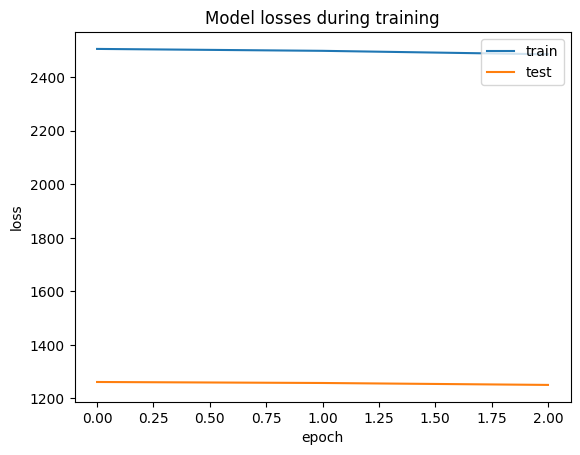

In [ ]:
import matplotlib.pyplot as plt

# Plot changes in model loss during training
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.title("Model losses during training")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc="upper right")
plt.show()

In [30]:
model = MountLensModel(use_ratings=True)
#model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))
model.compile(optimizer='adam')

history = model.fit(cached_train, validation_data=cached_test,
    validation_freq=1, epochs=20)

train_accuracy = model.evaluate(
    cached_train, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]
test_accuracy = model.evaluate(
    cached_test, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]

print(f"Top-100 accuracy (train): {train_accuracy:.2f}.")
print(f"Top-100 accuracy (test): {test_accuracy:.2f}.")

Epoch 1/20


8/8 [==============================] - ETA: 0s - factorized_top_k/top_1_categorical_accuracy: 0.0760 - factorized_top_k/top_5_categorical_accuracy: 0.4442 - factorized_top_k/top_10_categorical_accuracy: 0.7305 - factorized_top_k/top_50_categorical_accuracy: 1.0000 - factorized_top_k/top_100_categorical_accuracy: 1.0000 - loss: 3106.9442 - regularization_loss: 0.0000e+00 - total_loss: 3106.9442

8/8 [==============================] - 7s 420ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0760 - factorized_top_k/top_5_categorical_accuracy: 0.4442 - factorized_top_k/top_10_categorical_accuracy: 0.7305 - factorized_top_k/top_50_categorical_accuracy: 1.0000 - factorized_top_k/top_100_categorical_accuracy: 1.0000 - loss: 3040.2144 - regularization_loss: 0.0000e+00 - total_loss: 3040.2144 - val_factorized_top_k/top_1_categorical_accuracy: 0.2720 - val_factorized_top_k/top_5_categorical_accuracy: 0.7010 - val_factorized_top_k/top_10_categorical_accuracy: 0.9050 - val_factorized_top_k/top_50_categorical_accuracy: 1.0000 - val_factorized_top_k/top_100_categorical_accuracy: 1.0000 - val_loss: 1262.0200 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1262.0200
Epoch 2/20
8/8 [==============================] - 2s 271ms/step - factorized_top_k/top_1_categorical_accuracy: 0.2663 - factorized_top_k/top_5_categorical_accuracy: 0.7623 - factorized_top_k/top_10_categorical_accur

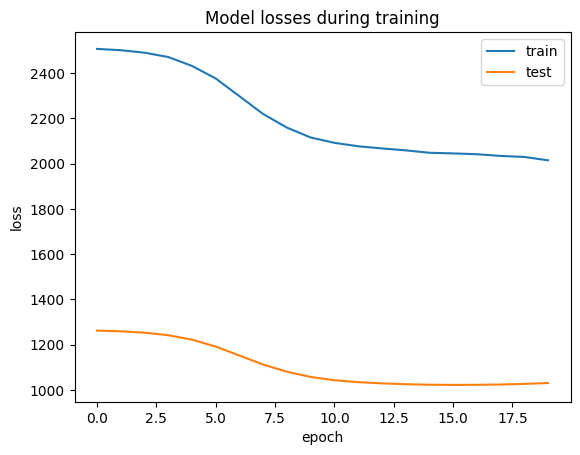

In [31]:
import matplotlib.pyplot as plt

# Plot changes in model loss during training
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model losses during training")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc="upper right")
plt.show()

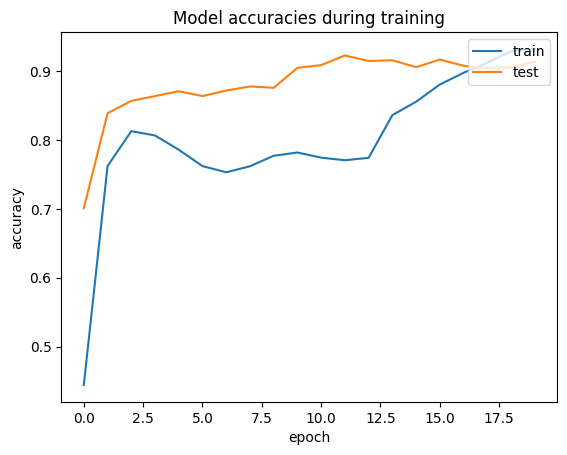

In [32]:

# Plot changes in model accuracy during training
plt.plot(history.history["factorized_top_k/top_5_categorical_accuracy"])
plt.plot(history.history["val_factorized_top_k/top_5_categorical_accuracy"])
plt.title("Model accuracies during training")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "test"], loc="upper right")
plt.show()

In [79]:
print(cached_test.take(1))

<_TakeDataset element_spec={'mount_name': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'user_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'rating': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'level': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>


In [83]:
model.summary()

Model: "mount_lens_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   multiple                  33488     
                                                                 
 sequential_6 (Sequential)   (None, 16)                321616    
                                                                 
 retrieval (Retrieval)       multiple                  1         
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
Total params: 355,105
Trainable params: 355,104
Non-trainable params: 1
_________________________________________________________________


In [82]:
# Create a model that takes in raw query features, and
index = tfrs.layers.factorized_top_k.BruteForce(model.query_model)
# recommends movies out of the entire movies dataset.
index.index_from_dataset(
  tf.data.Dataset.zip((gunung.batch(100), gunung.batch(100).map(model.candidate_model)))
)

# Get recommendations.
_, titles = index({
      "user_id": 46,
      "level":1,
      "rating":0
  })
print(f"Recommendations for user 42: {titles[0, :3]}")

InvalidArgumentError: ignored

In [51]:
scann_index = tfrs.layers.factorized_top_k.ScaNN(model.query_model)
scann_index.index_from_dataset(
  tf.data.Dataset.zip((gunung.batch(100), gunung.batch(100).map(model.candidate_model)))
)

_, titles = scann_index(tf.constant(["42"]))
print(f"Recommendations for user 42: {titles[0, :3]}")

ImportError: ignored

# Build Ranking task


In [ ]:
## feature selection
# we just use column mount_name and user_id from ratings dataset 
# and Nama_Gunung column from gunung dataset

rank_ratings = tf_rating.map(lambda x: {
    "mount_name": x["mount_name"],
    "user_id": x["user_id"],
    "rating": x["rating"]
})
rank_gunung = tf_gunung.map(lambda x: {
    "mountain_id": x["mountain_id"],
    "mount_name": x["Nama_Gunung "],
    "location": x["Lokasi "]

})

In [ ]:
## Split dataset randomly (80% for train and 20% for test)
trainset_size = 0.8 * ratings.__len__().numpy()
# In an industrial recommender system, this would most likely be done by time:
# The data up to time T would be used to predict interactions after T.

# set the global seed:
tf.random.set_seed(42)
# More info: https://www.tensorflow.org/api_docs/python/tf/random/set_seed

# Shuffle the elements of the dataset randomly.
rank_ratings_dataset_shuffled = rank_ratings.shuffle(
    # the new dataset will be sampled from a buffer window of first `buffer_size`
    # elements of the dataset
    buffer_size=100_000,
    # set the random seed that will be used to create the distribution.
    seed=42,
    # `list(dataset.as_numpy_iterator()` yields different result for each call
    # Because reshuffle_each_iteration defaults to True.
    reshuffle_each_iteration=False
)
# More info: https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
 
rank_ratings_trainset = rank_ratings_dataset_shuffled.take(trainset_size)
rank_ratings_testset = rank_ratings_dataset_shuffled.skip(trainset_size)


In [ ]:
user_ids_vocabulary = tf.keras.layers.IntegerLookup(mask_token=None)
user_ids_vocabulary.adapt(rank_ratings_trainset.map(lambda x: x["user_id"]))
 
 
gunung_name_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
gunung_name_vocabulary.adapt(rank_gunung.map(lambda x: x["mount_name"]))

In [ ]:
class RankingModel(tfrs.models.Model):
  """MovieLens ranking model"""

  def __init__(self, query_model, candidate_model):
    super().__init__()

    self.query_model: tf.keras.Model = user_model
    self.candidate_model: tf.keras.Model = gunung_model
    self.rating_model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1)
        ]
    )
    self.ranking_task_layer: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[
            tf.keras.metrics.RootMeanSquaredError()
        ]
    )

  def compute_loss(self, features, training=False) -> tf.Tensor:
    query_embeddings = self.query_model(features['user_id'])
    candidate_embeddings = self.candidate_model(features['mount_name'])
    rating_predictions = self.rating_model(
        tf.concat(
            [query_embeddings, candidate_embeddings],
            axis=1
        )
        # We could use `tf.keras.layers.Concatenate(axis=1)([x, y])`
    )

    loss = self.ranking_task_layer(
        predictions=rating_predictions,
        labels=features["rating"]
    )
    return loss

In [ ]:

movielens_ranking_model = RankingModel(user_model, gunung_model)

optimizer_step_size = 0.1
movielens_ranking_model.compile(
    optimizer=tf.keras.optimizers.Adagrad(
        learning_rate=optimizer_step_size
    )
)

In [ ]:
ranking_ratings_trainset = rank_ratings_trainset.shuffle(100_000).batch(8192).cache()
ranking_ratings_testset = rank_ratings_testset.batch(4096).cache()

history = movielens_ranking_model.fit(
    ranking_ratings_trainset,
    validation_data=ranking_ratings_testset,
    validation_freq=1,
    epochs=10
)

Epoch 1/10
1/1 [==============================] - 1s 751ms/step - root_mean_squared_error: 3.0359 - loss: 9.2166 - regularization_loss: 0.0000e+00 - total_loss: 9.2166 - val_root_mean_squared_error: 2.9378 - val_loss: 8.6305 - val_regularization_loss: 0.0000e+00 - val_total_loss: 8.6305
Epoch 2/10
1/1 [==============================] - 0s 125ms/step - root_mean_squared_error: 2.8583 - loss: 8.1699 - regularization_loss: 0.0000e+00 - total_loss: 8.1699 - val_root_mean_squared_error: 2.6097 - val_loss: 6.8106 - val_regularization_loss: 0.0000e+00 - val_total_loss: 6.8106
Epoch 3/10
1/1 [==============================] - 0s 120ms/step - root_mean_squared_error: 2.5195 - loss: 6.3479 - regularization_loss: 0.0000e+00 - total_loss: 6.3479 - val_root_mean_squared_error: 2.0278 - val_loss: 4.1120 - val_regularization_loss: 0.0000e+00 - val_total_loss: 4.1120
Epoch 4/10
1/1 [==============================] - 0s 141ms/step - root_mean_squared_error: 1.9343 - loss: 3.7413 - regularization_loss: 

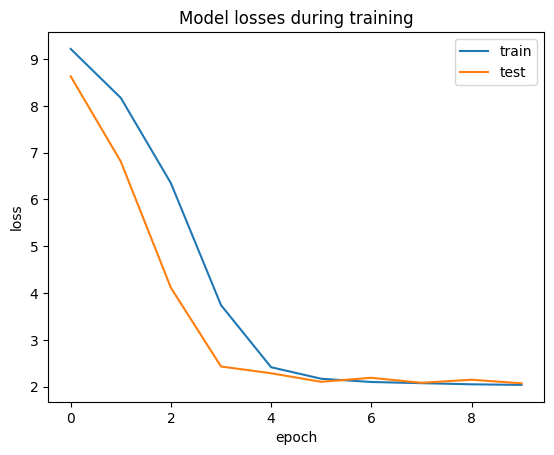

In [ ]:
# Plot changes in model loss during training
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model losses during training")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc="upper right")
plt.show()